<a href="https://colab.research.google.com/github/jear2412/MA8701-AdvancedStatistical/blob/main/BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install swiftviz


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing 
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV



from sklearn.linear_model import Lasso,LassoCV, lasso_path,LogisticRegression,LogisticRegressionCV 

import swiftviz as sv #pip install 
from mlxtend.plotting import plot_confusion_matrix

from sklearn.svm import l1_min_c
from time import time


sns.set_style("darkgrid")

In [4]:
bcdf = pd.read_csv('wisconsin-bc.csv')
bcdf.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
bcdf.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
#drop id and unnamed 32

bcdf.drop(columns=['id', 'Unnamed: 32'], inplace=True)

In [7]:
bcdf.info()

#No null values and all seem to have correct type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [8]:
report = bcdf.describe().T
report

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [9]:
features = np.array(report.index)
target = ['diagnosis']
features

array(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'], dtype=object)

In [10]:
report

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


B    357
M    212
Name: diagnosis, dtype: int64


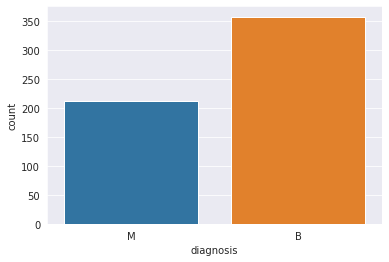

In [11]:
print(bcdf["diagnosis"].value_counts())
sns.countplot(x=bcdf["diagnosis"]);

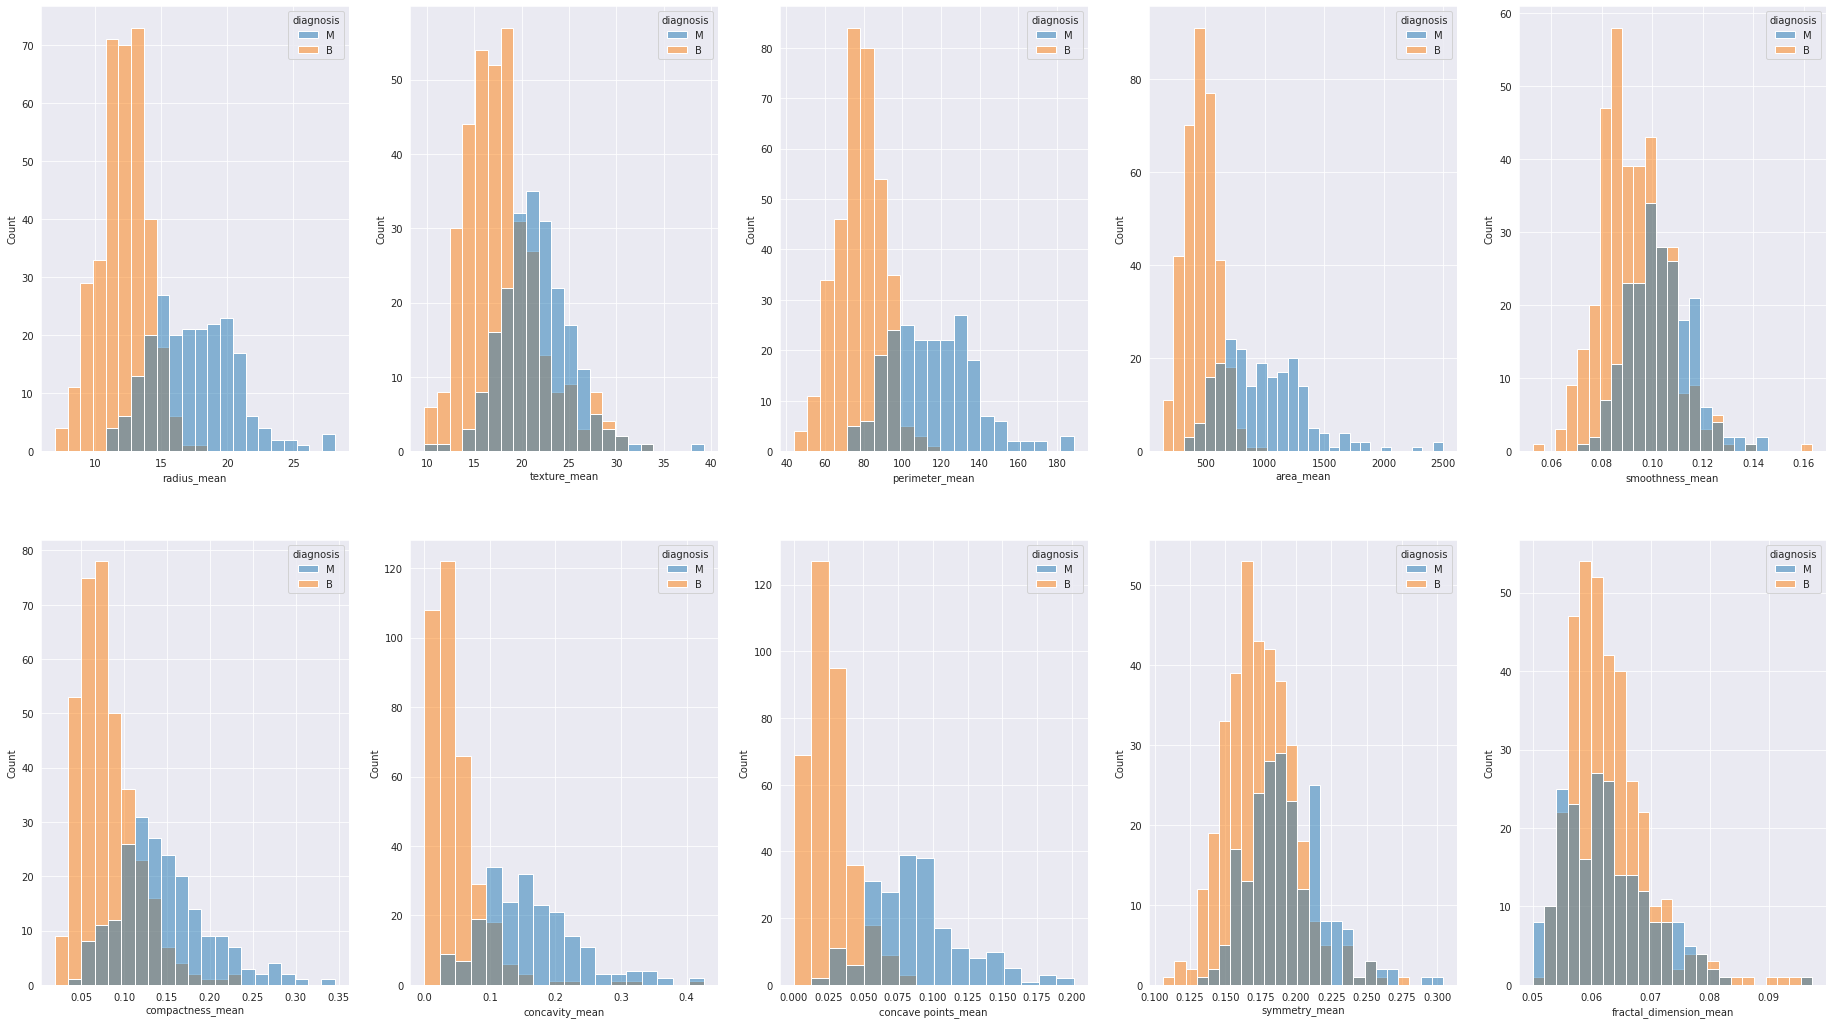

In [12]:
#----- 1:10

axis = sv.Plotter.row_col_merge(rows=2, cols=5)

#cust_palette.set_default_custom_palette('dark')
axis_var_list = list(zip(axis, features[0:10]))

fig, axs = plt.subplots(figsize=(32, 18), nrows=2, ncols=5)

for axis_tup, var in axis_var_list:
    row = axis_tup[0]
    col = axis_tup[1]
    sns.histplot(data=bcdf, x=var, ax=axs[row, col], hue="diagnosis")

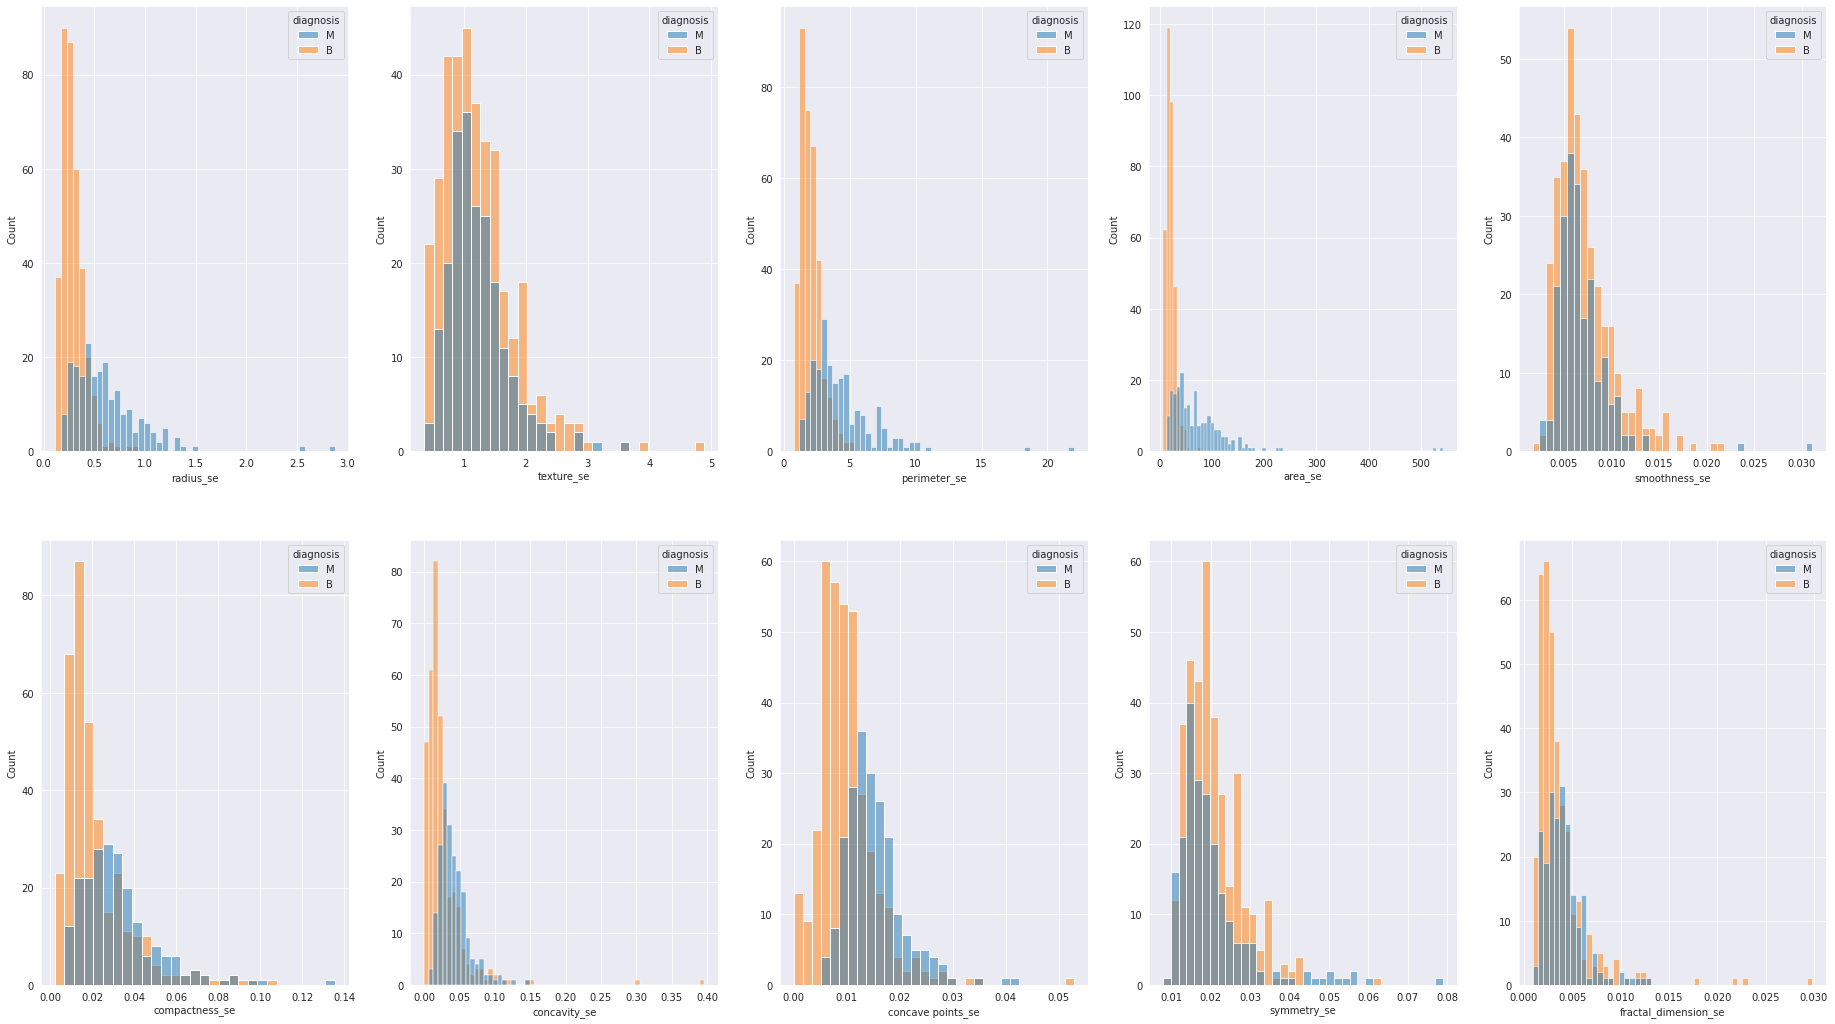

In [14]:

#------------ 11:20

axis = sv.Plotter.row_col_merge(rows=2, cols=5)

#cust_palette.set_default_custom_palette('dark')
axis_var_list = list(zip(axis, features[10:20]))

fig, axs = plt.subplots(figsize=(32, 18), nrows=2, ncols=5)

for axis_tup, var in axis_var_list:
    row = axis_tup[0]
    col = axis_tup[1]
    sns.histplot(data=bcdf, x=var, ax=axs[row, col], hue="diagnosis")

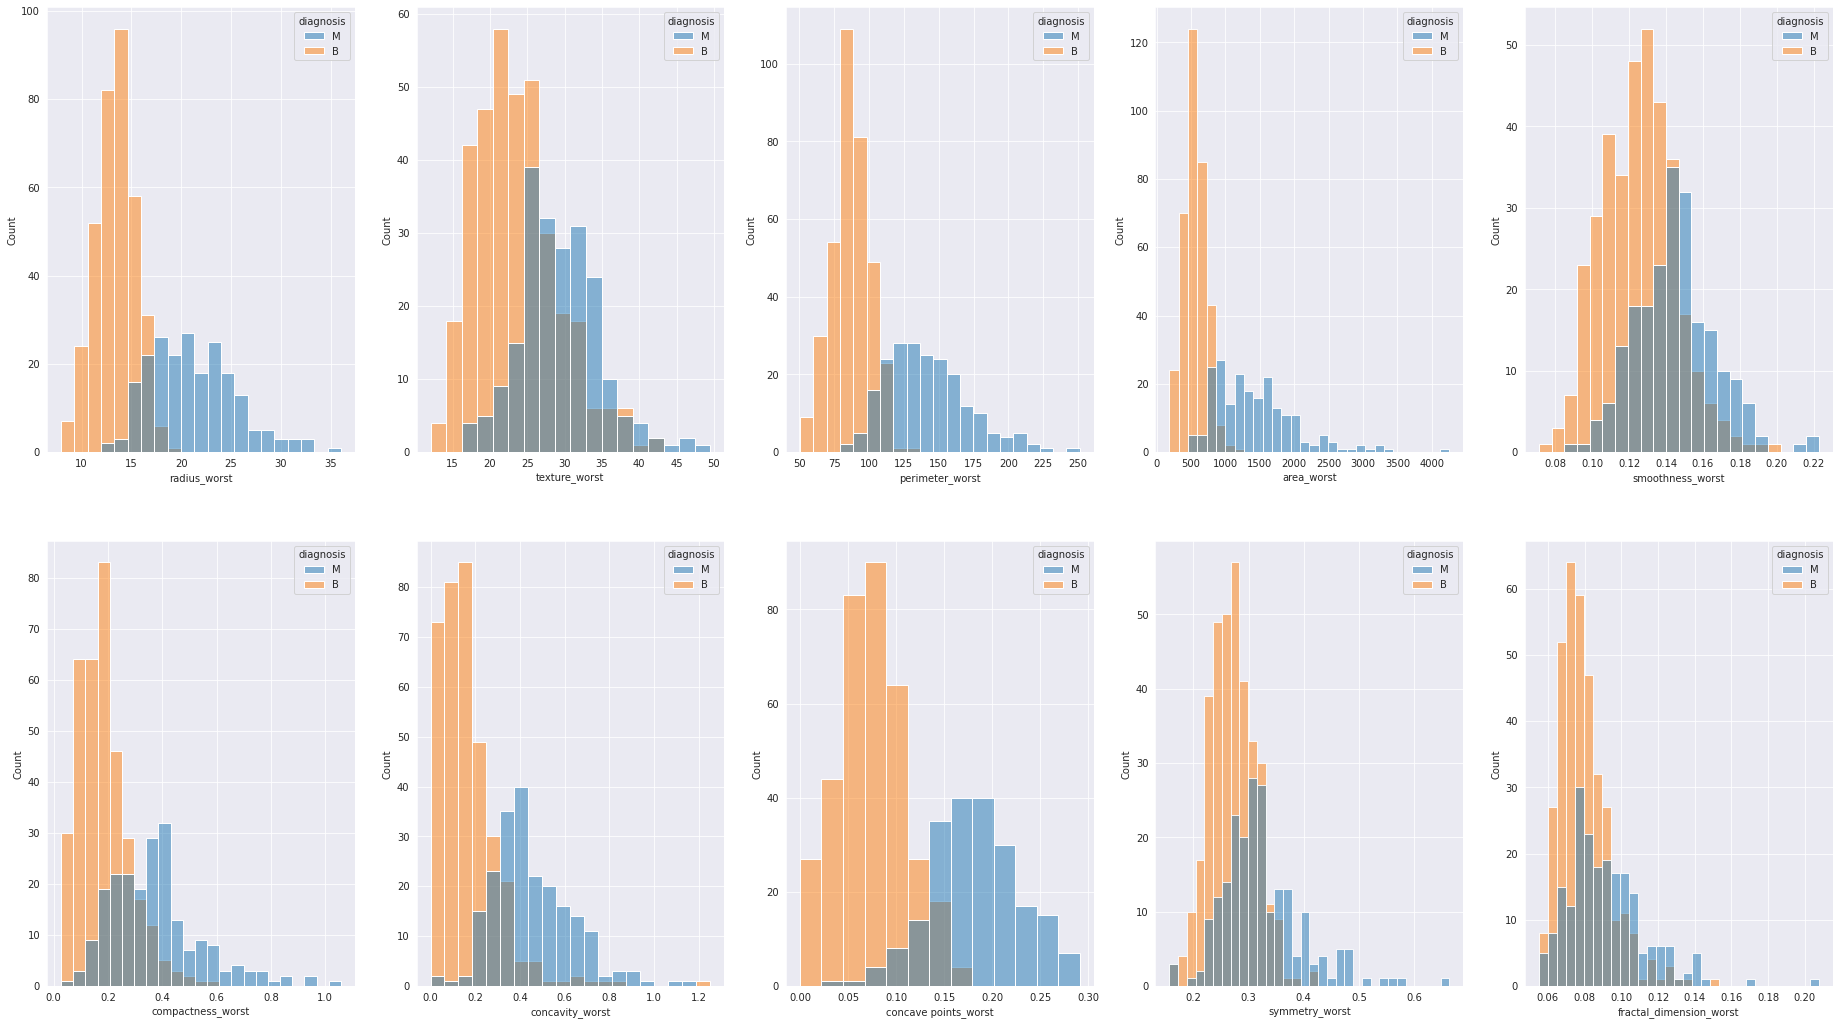

In [31]:
#-------- 21:30

axis = sv.Plotter.row_col_merge(rows=2, cols=5)

#cust_palette.set_default_custom_palette('dark')
axis_var_list = list(zip(axis, features[20:]))

fig, axs = plt.subplots(figsize=(32, 18), nrows=2, ncols=5)

for axis_tup, var in axis_var_list:
    row = axis_tup[0]
    col = axis_tup[1]
    sns.histplot(data=bcdf, x=var, ax=axs[row, col], hue="diagnosis")

In [60]:
#box plots


y = bcdf['diagnosis']
X = bcdf.drop(columns=['diagnosis'])

#standardization
X_ = (X - X.mean()) / X.std()




(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

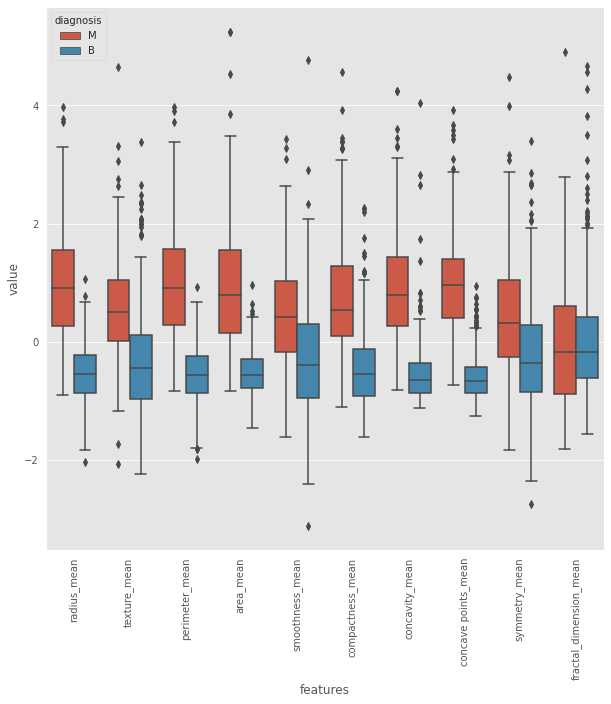

In [61]:
# First 10
mean_data = pd.concat([y,X_.iloc[:,0:10]],axis=1)
mean_data = pd.melt(mean_data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data= mean_data   )
plt.xticks(rotation=90)

In [ ]:
# Second 10
se_data = pd.concat([y,X_.iloc[:,10:20]],axis=1)
se_data = pd.melt(mean_data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=se_data)
plt.xticks(rotation=90)

In [ ]:
#Last 10

worst_data = pd.concat([y,X_.iloc[:,20:30]],axis=1)
worst_data = pd.melt(mean_data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=worst_data)
plt.xticks(rotation=90)

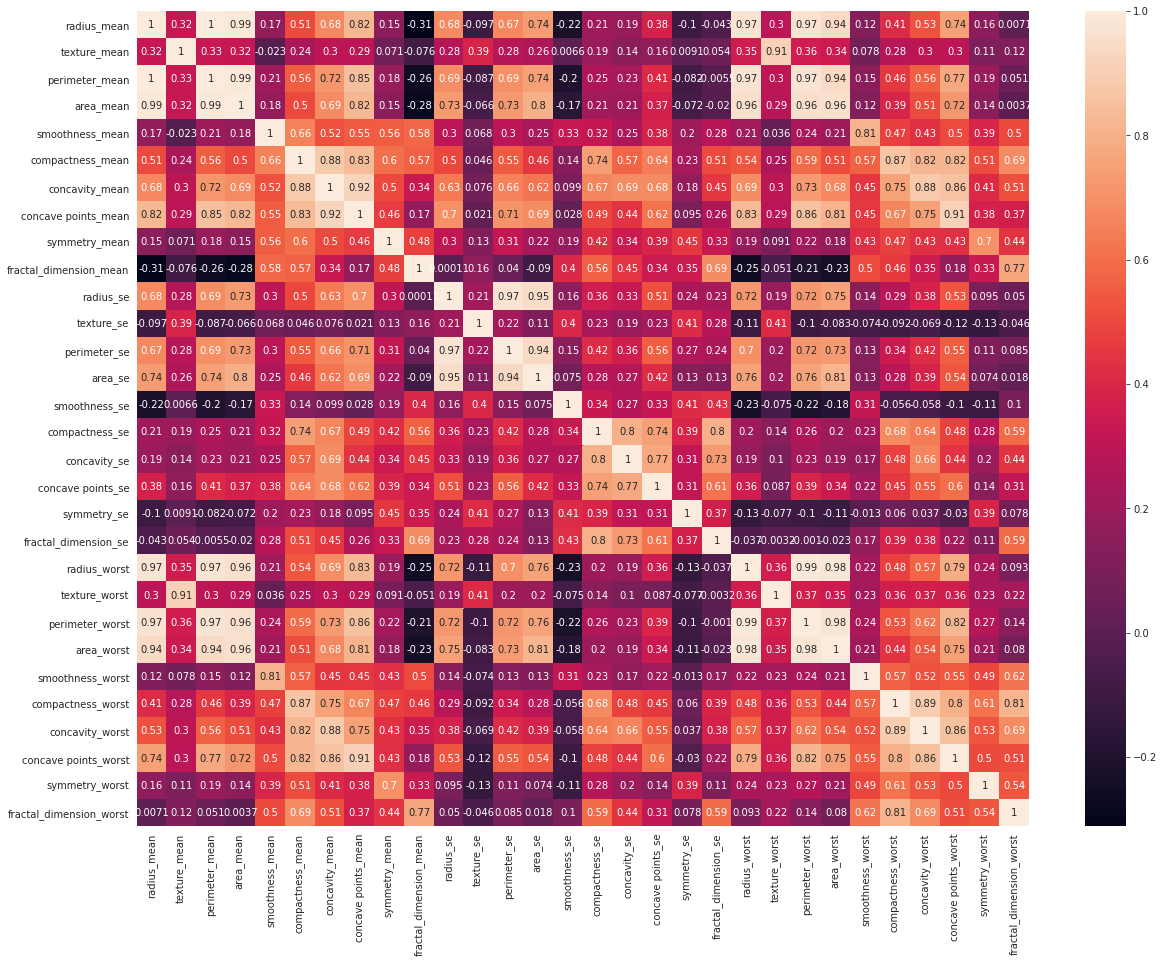

In [15]:
corr_matrix = bcdf.corr()

fig, axs = plt.subplots(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True)

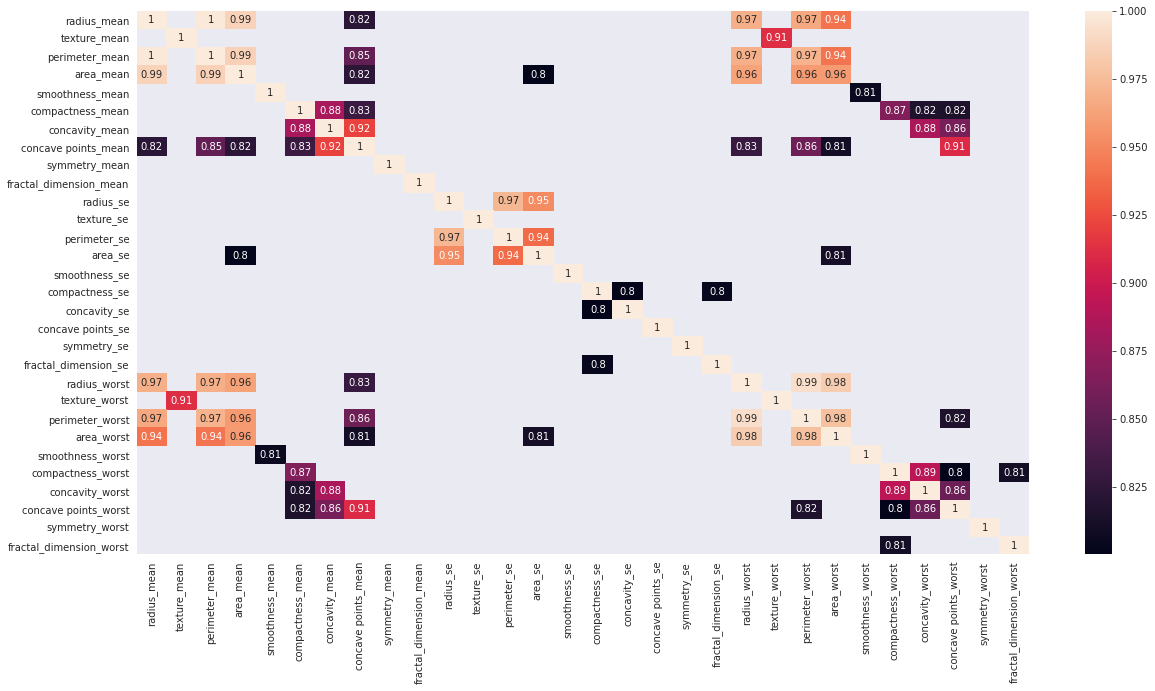

In [16]:
threshold = 0.8
cond_corr_matrix = corr_matrix[(corr_matrix > threshold) | (corr_matrix < -threshold)]

fig, axs = plt.subplots(figsize=(20, 10))
sns.heatmap(cond_corr_matrix, annot=True)

In [ ]:
# a lot of correlation ---> ridge? lasso? elastic net? remove variables?  
# 

In [17]:
X= bcdf.iloc[:,1:]
y= bcdf.iloc[:,0]


In [18]:
#Scaling  
stscaler = preprocessing.StandardScaler()
X = stscaler.fit_transform(X)

#np.mean(X,0)
#np.var(X,0)


In [64]:
#-----logistic lasso 

# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html

#‘elasticnet’ is only supported by the ‘saga’ solver.
clf = LogisticRegressionCV( penalty='l1', cv=10, random_state=0, fit_intercept=False, scoring='neg_log_loss', solver='saga', n_jobs=-1, max_iter=250 ).fit(X, y);

#best value
clf.C_



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.6/dist-packages/sklearn

array([10000.])

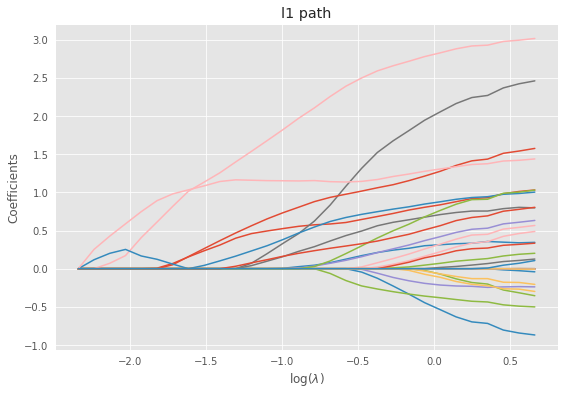

In [33]:
# Path plot 
plt.style.use('ggplot')


cs = l1_min_c(X, y, loss='log') * np.logspace(0, 3, 30)


clf = LogisticRegression(penalty='l1', solver='saga',tol=1e-3, max_iter=int(1e4), warm_start=True)
                                                                      
coefs_ = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(X, np.ravel(y))    
    coefs_.append(clf.coef_.ravel().copy())


coefs_ = np.array(coefs_)
plt.figure(figsize=(9,6))
plt.plot(np.log10(cs), coefs_)
ymin, ymax = plt.ylim()
plt.xlabel('log('+r'$\lambda$'+')')
plt.ylabel('Coefficients')
plt.title('l1 path')
plt.axis('tight')
plt.savefig("meowl12", dpi = 600)
plt.show()

In [38]:

#‘elasticnet’ is only supported by the ‘saga’ solver.
clf = LogisticRegressionCV( penalty='l1', cv=10, random_state=0, fit_intercept=False, scoring='neg_log_loss', solver='saga', n_jobs=-1, max_iter=250 ).fit(X, y)

#best value
clf.C_


loglasso=LogisticRegression(C=clf.C_[0], penalty='l1', tol=0.01, solver='saga')
loglasso.fit(X, y)




/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.6/dist-packages/sklearn

array([[355,   2],
       [  5, 207]])

In [39]:
loglasso.score(X, y)
confusion_matrix(y_true=y, y_pred= loglasso.predict(X) )

array([[355,   2],
       [  5, 207]])

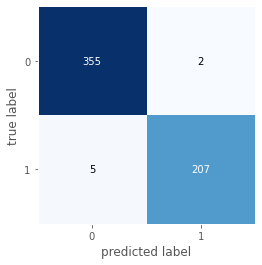

In [41]:
conf_matrix = confusion_matrix(y ,  loglasso.predict(X)   )
plot_confusion_matrix(conf_mat=conf_matrix);


